In [1]:

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, mean_absolute_error, mean_squared_error, r2_score, roc_auc_score
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("C:/Users/NEIST/Desktop/Pre/main_datasets/correlation_dataset_100.csv")

In [3]:
df.target.value_counts()

1    1298
0    1060
Name: target, dtype: int64

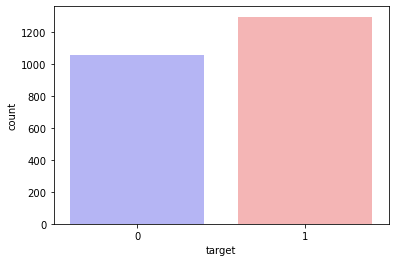

In [4]:
sns.countplot(x="target", data=df, palette="bwr")
plt.show()

In [5]:
countNoDisease = len(df[df.target == False])
countHaveDisease = len(df[df.target == True])
print("Percentage of values with False: {:.2f}%".format((countNoDisease / (len(df.target))*100)))
print("Percentage of values with True: {:.2f}%".format((countHaveDisease / (len(df.target))*100)))

Percentage of values with False: 44.95%
Percentage of values with True: 55.05%


In [6]:
y = df.target.values
x_data = df.drop(['target'], axis = 1)

In [7]:
# Normalize
x = (x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data)).values

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=0, stratify = y)

In [9]:
x_train, x_val, y_train, y_val = train_test_split(x_train,y_train,test_size = 0.10,random_state=0)

In [16]:
x_val.size

18900

In [10]:
#transpose matrices
x_train = x_train.T
y_train = y_train.T
x_test = x_test.T
y_test = y_test.T
x_val = x_val.T
y_val = y_val.T

169700

In [11]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train.T, y_train.T)
predictions = dtc.predict(x_test.T)
acc = dtc.score(x_test.T, y_test.T)*100
predictions_tr = dtc.predict(x_train.T)
acc_tr =dtc.score(x_train.T,y_train.T)*100
print(acc)
print(acc_tr)
#predictions_val = dtc.predict(x_val.T)
#acc_val =dtc.score(x_val.T,y_val.T)*100
#print(acc_val)

77.54237288135593
97.72004241781548


In [12]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=dtc, X=x_train.T, y=y_train.T, cv=10)
print(accuracies)
print(accuracies.mean())

[0.76190476 0.75132275 0.76719577 0.73544974 0.73544974 0.72486772
 0.71276596 0.74468085 0.78191489 0.7712766 ]
0.7486828774062817


In [13]:
cf =(confusion_matrix(y_test, predictions))
#cf_val =(confusion_matrix(y_val, predictions_val))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))
print(confusion_matrix(y_train, predictions_tr))
print(classification_report(y_train, predictions_tr))
#print(confusion_matrix(y_val, predictions_val))
#print(classification_report(y_val, predictions_val))

[[158  54]
 [ 52 208]]
              precision    recall  f1-score   support

           0       0.75      0.75      0.75       212
           1       0.79      0.80      0.80       260

    accuracy                           0.78       472
   macro avg       0.77      0.77      0.77       472
weighted avg       0.78      0.78      0.78       472

[[ 840    8]
 [  35 1003]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       848
           1       0.99      0.97      0.98      1038

    accuracy                           0.98      1886
   macro avg       0.98      0.98      0.98      1886
weighted avg       0.98      0.98      0.98      1886



In [14]:
from sklearn.metrics import matthews_corrcoef
matthews_corrcoef(y_test, predictions)

0.5457783255545396

In [15]:
#from sklearn.metrics import matthews_corrcoef
#matthews_corrcoef(y_val, predictions_val)

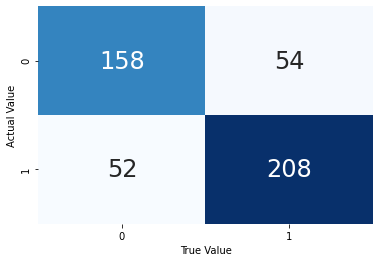

In [16]:
cf_plt =sns.heatmap(cf,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})
cf_plt.set(xlabel = "True Value", ylabel ="Actual Value")
cf_plt

In [17]:
#cf_plt =sns.heatmap(cf_val,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})
#cf_plt.set(xlabel = "True Value", ylabel ="Actual Value")
#cf_plt

In [18]:
#parameters
r_auc_score = roc_auc_score(y_test, predictions)
print('AUC = %0.3f)' % r_auc_score)
rsquare = r2_score(y_test, predictions)
print('R2 = %0.3f)' % rsquare)
#mae = mean_absolute_error(y_test, predictions)
#print('MAE = %0.3f)' % mae)
mse = mean_squared_error(y_test, predictions)
print('MSE = %0.3f)' % mse)
mbe = np.mean(predictions - y_test)
print('MBE = %0.3f)'% mbe)
rmse = mse** (1/2)
print('RMSE = %0.3f)' % rmse)
variance = np.var(predictions)
print('Variance = %0.3f)'% variance)
sse = np.mean((np.mean(predictions) - y)** 2)
bias = sse - variance
print('Bias = %0.3f)'% bias)

AUC = 0.773)
R2 = 0.092)
MSE = 0.225)
MBE = 0.004)
RMSE = 0.474)
Variance = 0.247)
Bias = 0.001)


In [19]:
#fall out
FP = cf.sum(axis=0) - np.diag(cf) 
FN = cf.sum(axis=1) - np.diag(cf)
TP = np.diag(cf)
TN = cf.sum() - (FP + FN + TP)
FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)
# Sensitivity, hit rate, recall, or true positive rate
#TPR = TP/(TP+FN)
# Specificity or true negative rate
#TNR = TN/(TN+FP) 
# Precision or positive predictive value
#PPV = TP/(TP+FP)
# Negative predictive value
#NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)
# Overall accuracy for each class
#ACC = (TP+TN)/(TP+FP+FN+TN)
print(FPR)
print(FNR)
print(FDR)

[0.2        0.25471698]
[0.25471698 0.2       ]
[0.24761905 0.20610687]


In [20]:
print("complete")

complete
